In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

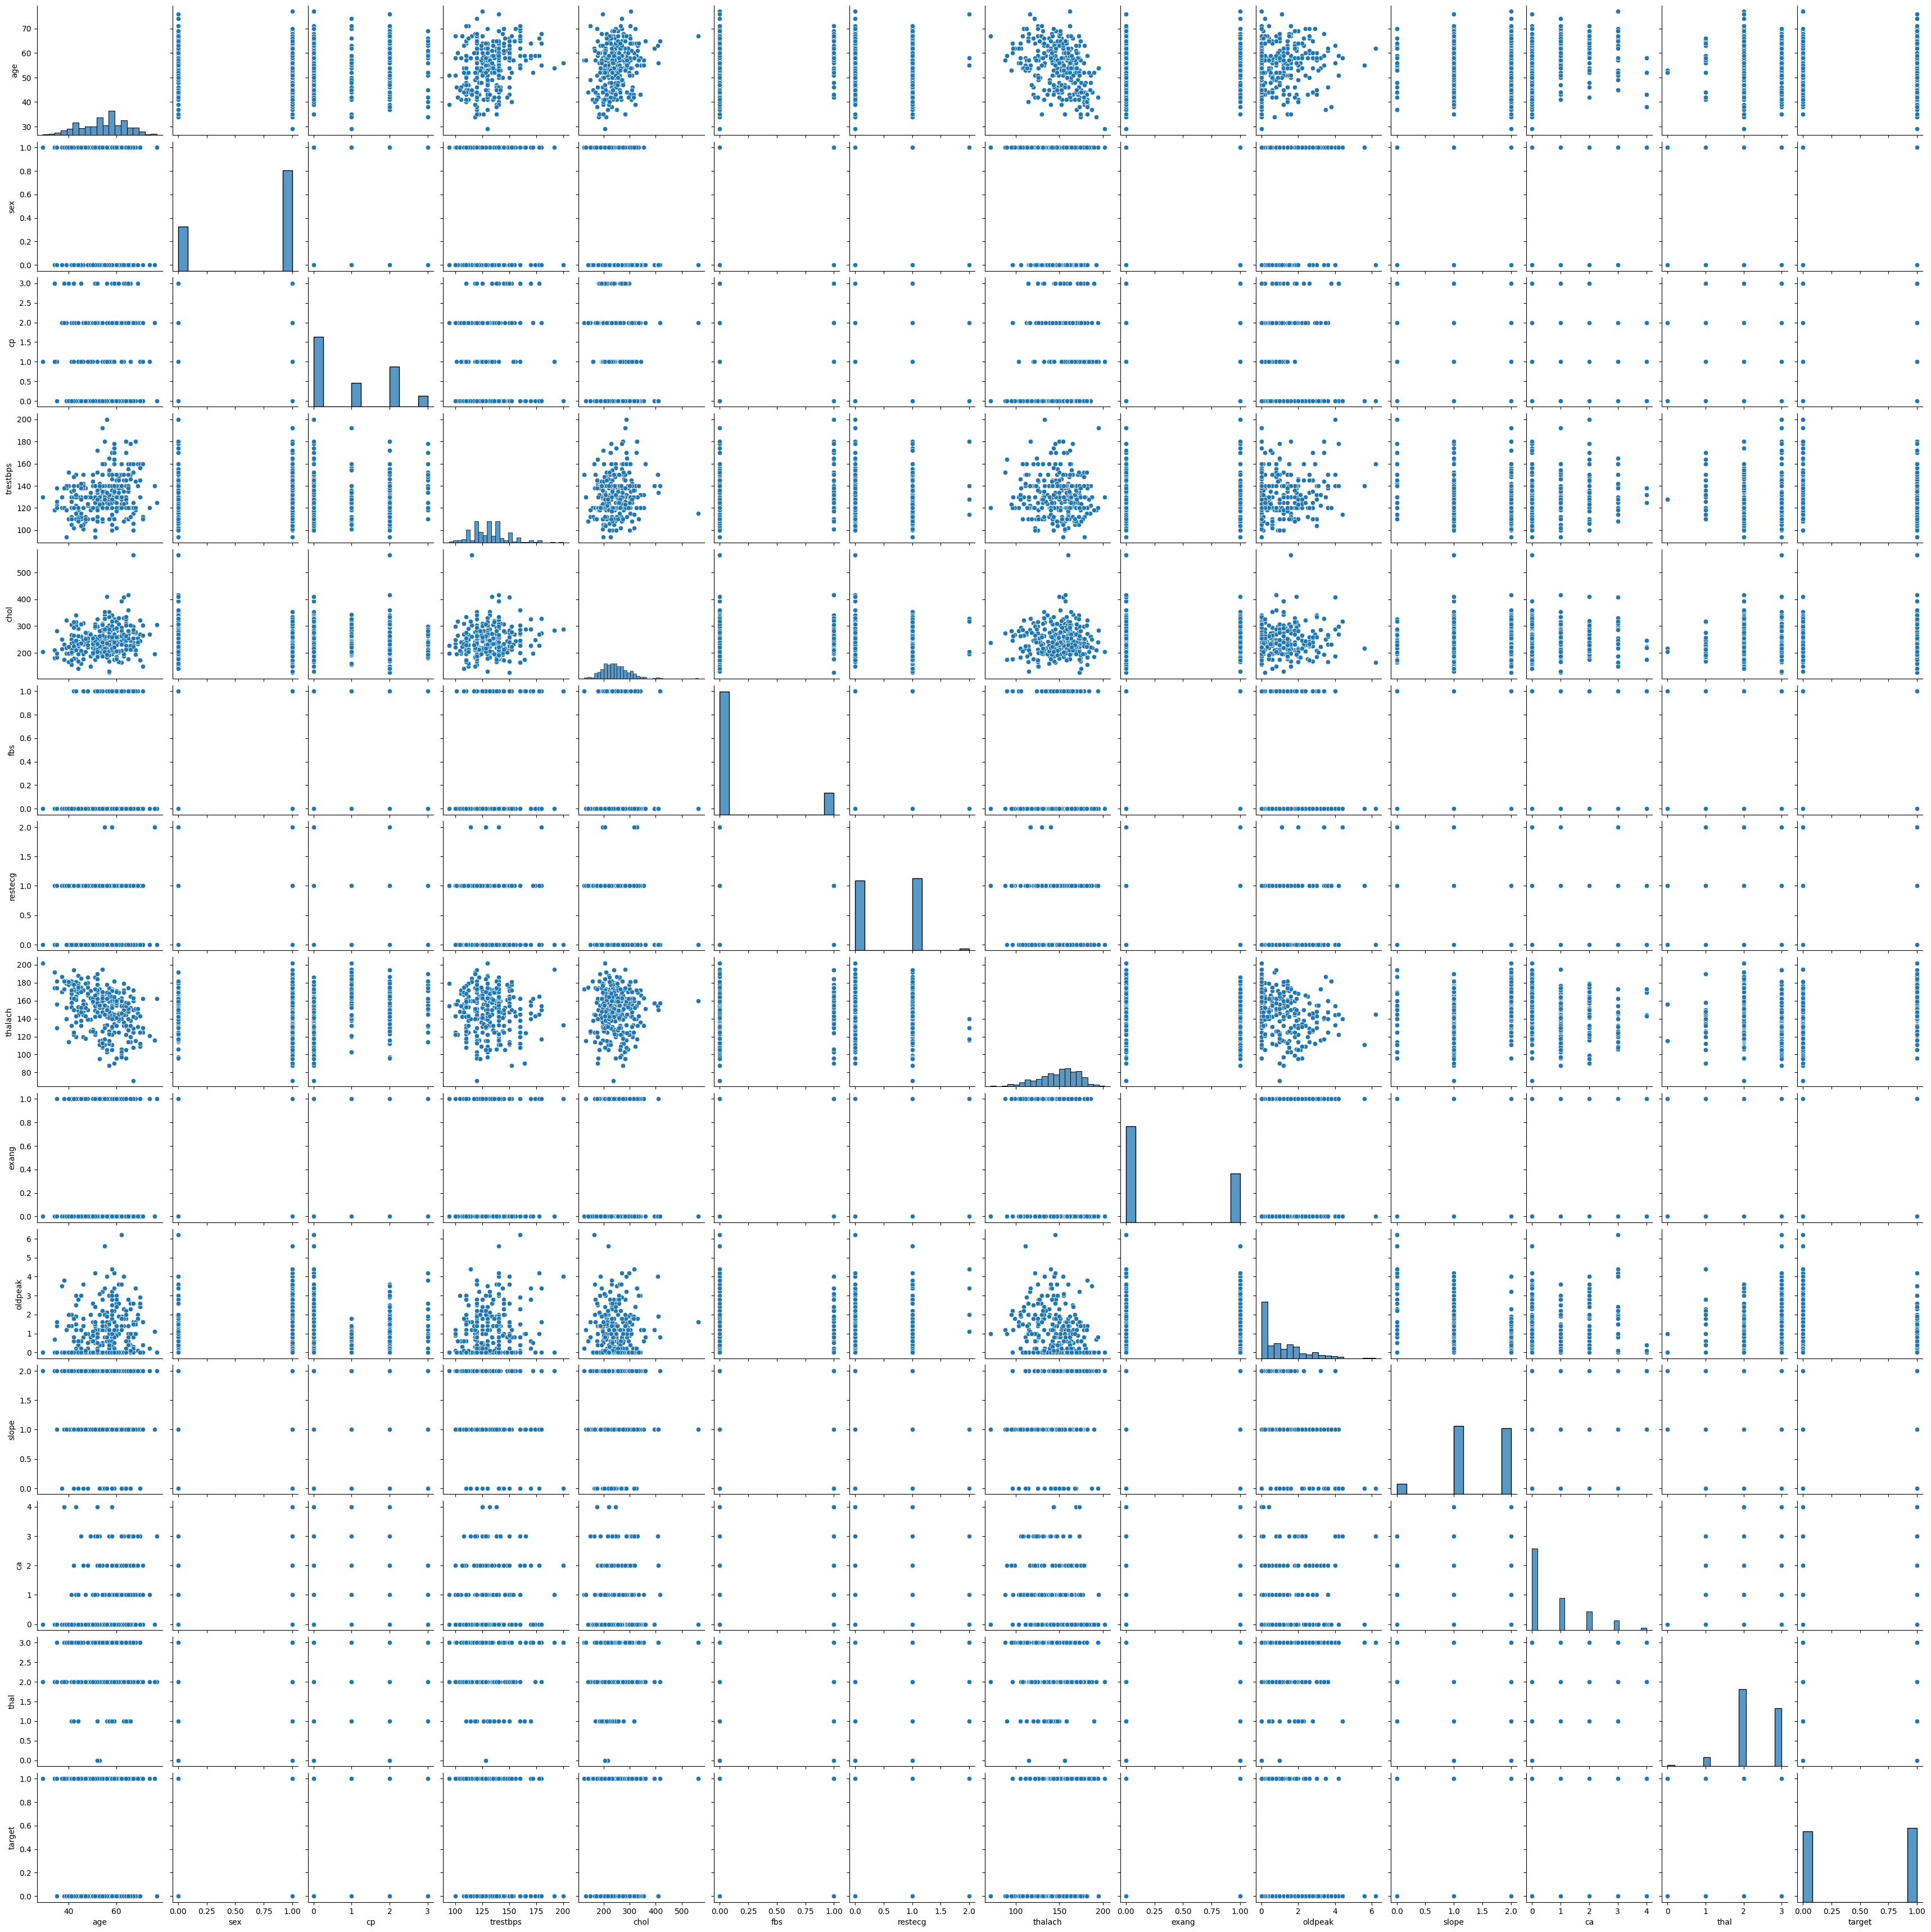

In [6]:
sns.pairplot(data=dataset)
plt.show()

In [7]:
dataset['target'].unique()

array([0, 1])

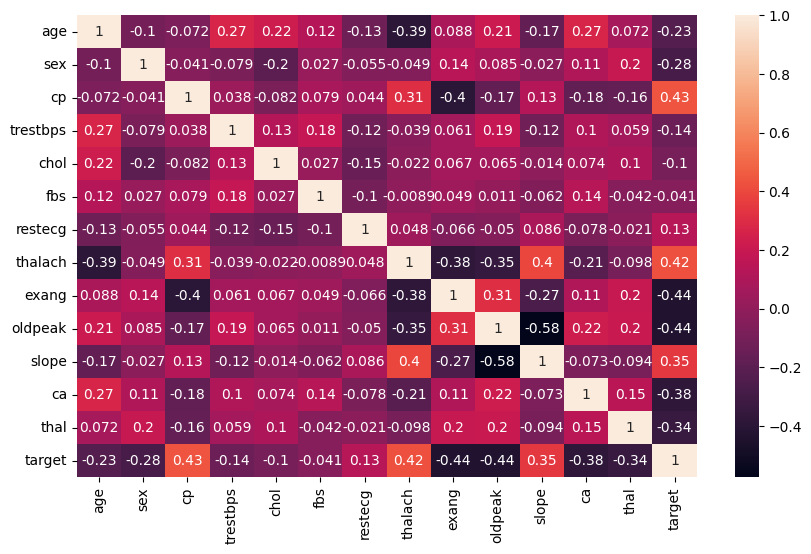

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [13]:
dataset['target'].value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [17]:
x=dataset.drop('target',axis=1)
y=dataset['target']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

C:\Users\akshi\anaconda3\envs\ML_Practice\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
lr.intercept_
lr.coef_

array([[ 0.01890326, -1.70428594,  0.84128562, -0.01186143, -0.00971583,
        -0.24063304,  0.28735217,  0.03810452, -0.68194671, -0.62692343,
         0.56978962, -0.77007596, -0.93785256]])

In [22]:
y_pred=lr.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,roc_curve,roc_auc_score
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("F1 Score:",f1)
print(acc*100)

F1 Score: 0.8120300751879699
80.54474708171206


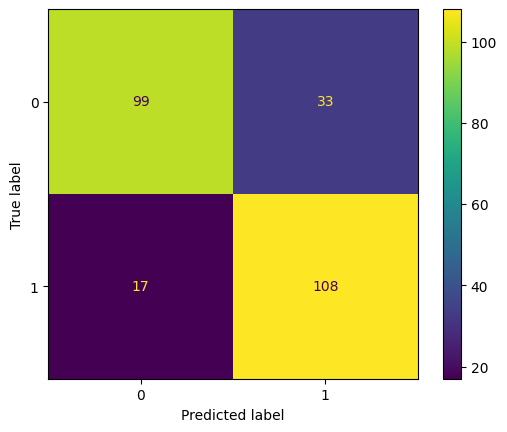

In [25]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [32]:
recall=99/(99+17)
precision=99/(99+33)
print(recall,precision)

0.853448275862069 0.75


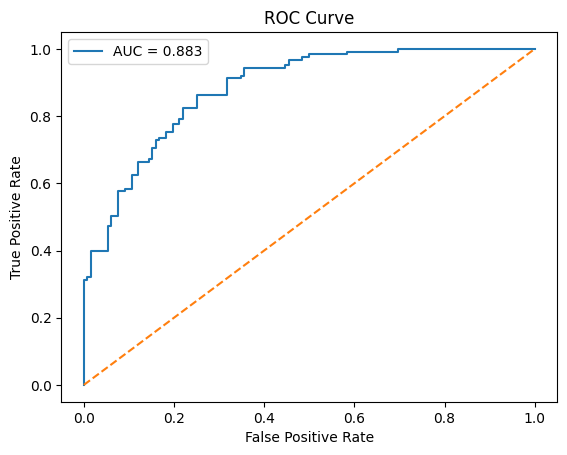

In [67]:
y_prob=lr.predict_proba(x_test)[:,1]
y_pred_paranoid=(y_prob>0.3).astype(int)
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [31]:
print(y_pred_paranoid)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0]


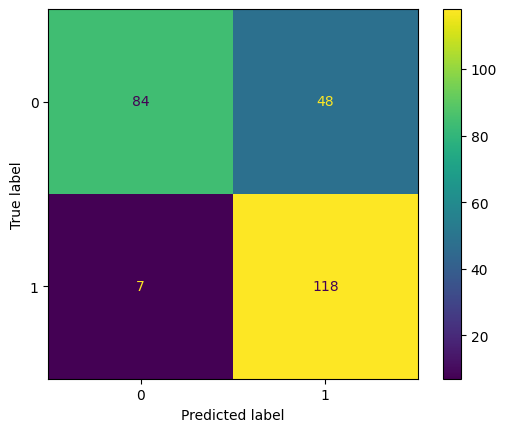

In [34]:
cm_updated=confusion_matrix(y_test,y_pred_paranoid)
ConfusionMatrixDisplay(confusion_matrix=cm_updated).plot()

In [35]:
recall_updated=84/(84+7)
precision_updated=84/(84+48)

In [36]:
print(recall_updated,precision_updated)

0.9230769230769231 0.6363636363636364


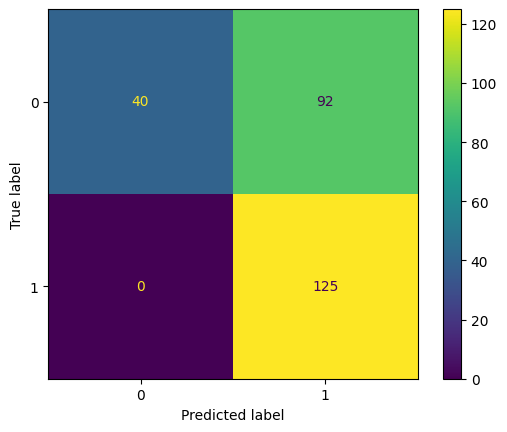

In [60]:
y_pred_0_recall=(y_prob>0.020312).astype(int)
cm_updated_0_recall=confusion_matrix(y_test,y_pred_0_recall)
ConfusionMatrixDisplay(confusion_matrix=cm_updated_0_recall).plot()

In [68]:
precision_updated=40/(40+92)
print(precision_updated)
print(accuracy_score(y_test,y_pred_0_recall))

0.30303030303030304
0.642023346303502


In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.transform(x_train)
x_test=ss.transform(x_test)

In [70]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

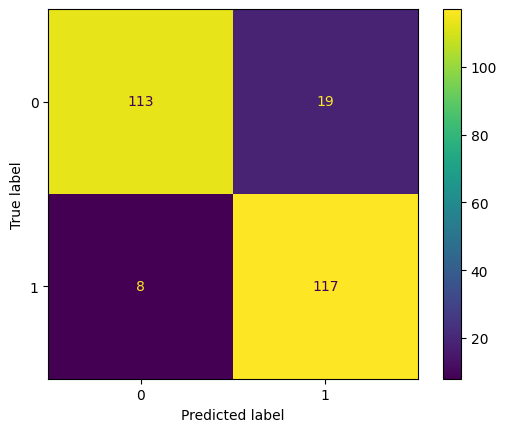

In [71]:
cm_svc=confusion_matrix(y_test,y_pred_svc)
ConfusionMatrixDisplay(confusion_matrix=cm_svc).plot()

In [73]:
prec=113/(113+19)
rec=113/(113+8)
print(prec)
print(rec)

0.8560606060606061
0.9338842975206612
